# Import All Python Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import time
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import f_classif, SelectKBest, VarianceThreshold
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Loading the Datasets

In [2]:
df = pd.read_csv('IoT Network Intrusion Dataset.csv')
total_instances = df.shape[0]

# Print the result
print("Total Instances:", total_instances)

Total Instances: 625783


In [3]:
'''import pandas as pd
import numpy as np

# Assuming df is your DataFrame
Max_Val_Float_64 = np.finfo(np.float64).max

# Iterate over all columns
for col in df.columns:
    # Check if the column contains infinite values
    if np.any(np.isinf(df[col])):
        # Replace infinite values with the maximum value of float64
        df[col] = df[col].replace([np.inf, -np.inf], Max_Val_Float_64)'''

'import pandas as pd\nimport numpy as np\n\n# Assuming df is your DataFrame\nMax_Val_Float_64 = np.finfo(np.float64).max\n\n# Iterate over all columns\nfor col in df.columns:\n    # Check if the column contains infinite values\n    if np.any(np.isinf(df[col])):\n        # Replace infinite values with the maximum value of float64\n        df[col] = df[col].replace([np.inf, -np.inf], Max_Val_Float_64)'

# Some Basic Cleaning and EDA

In [4]:
# There are some infinite values in this column, which prevent saling. So, replacing them by max value of float64
Max_Val_Float_64 = np.finfo(np.float64).max
df['Flow_Byts/s'] = df['Flow_Byts/s'].replace([np.inf, -np.inf], Max_Val_Float_64)
df['Flow_Pkts/s'] = df['Flow_Pkts/s'].replace([np.inf, -np.inf], Max_Val_Float_64)

# Replace Missing Value

In [5]:
 #Define the automated data imputation function
def Auto_Imputation(df):
    if df.isnull().values.any() or np.isinf(df).values.any(): # if there is any empty or infinite values
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.fillna(0, inplace = True)  # Replace empty values with zeros; 

In [6]:
# Replace missing values with the mode for each column
df.fillna(df.mode().iloc[0], inplace=True)


In [7]:
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


# Data Encoding and Data Normalization

In [8]:
Categorical_Columns = df.select_dtypes(include=['object']).columns
Numerical_Columns = df.select_dtypes(include=['int64','float64']).columns

print("Categorical Columns: ", Categorical_Columns)
print("Numerical Columns: ", Numerical_Columns)

Categorical Columns:  Index(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat'], dtype='object')
Numerical Columns:  Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Fla

# Counting Labels 

In [9]:
# Count the number of samples for each class in the 'Label' column
label_counts = df['Label'].value_counts()

label_counts

Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64

In [10]:
# Count the number of samples for each class in the 'Label' column
cat_counts = df['Cat'].value_counts()

cat_counts

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64

In [11]:
# Count the number of samples for each sub-category in the 'Sub_Cat' column
sub_cat_counts = df['Sub_Cat'].value_counts()

sub_cat_counts

Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64

# Data Scaling and Encoding

In [12]:
for col in Numerical_Columns:
    Scaler = MinMaxScaler()
    df[col] = Scaler.fit_transform(df[col].astype(str).astype('float64').values.reshape(-1,1))

for col in Categorical_Columns:
    if col != 'Label':
        LE = OrdinalEncoder()
        df[col] = LE.fit_transform(df[col].values.reshape(-1,1))
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446.0,25883.0,0.152672,203.0,0.154518,1.000000,3496.0,0.000750,0.005376,0.000000,...,0.0,0.0,0.0,0.000750,0.000000,0.000750,0.000750,Anomaly,2.0,2.0
1,22760.0,34617.0,0.033267,200.0,0.008475,0.352941,3664.0,0.053108,0.005376,0.001789,...,0.0,0.0,0.0,0.026557,0.033715,0.042551,0.010563,Anomaly,0.0,0.0
2,12691.0,25886.0,0.804992,200.0,0.137982,0.352941,2082.0,0.001410,0.000000,0.003578,...,0.0,0.0,0.0,0.000705,0.000011,0.000710,0.000700,Anomaly,4.0,8.0
3,12704.0,25886.0,0.808611,200.0,0.137982,0.352941,791.0,0.001510,0.000000,0.001789,...,0.0,0.0,0.0,0.001510,0.000000,0.001510,0.001510,Anomaly,2.0,4.0
4,611.0,25881.0,0.561267,317.0,0.029065,1.000000,1040.0,0.001530,0.010753,0.000000,...,0.0,0.0,0.0,0.000765,0.000011,0.000770,0.000760,Anomaly,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081.0,25889.0,0.856672,233.0,0.123036,1.000000,3443.0,0.002770,0.005376,0.000000,...,0.0,0.0,0.0,0.002771,0.000000,0.002771,0.002771,Anomaly,2.0,5.0
625779,18760.0,30623.0,0.069771,200.0,0.008475,0.352941,3637.0,0.016583,0.000000,0.001789,...,0.0,0.0,0.0,0.016584,0.000000,0.016584,0.016584,Anomaly,0.0,0.0
625780,12695.0,25886.0,0.805176,200.0,0.137982,0.352941,2285.0,0.000770,0.005376,0.000000,...,0.0,0.0,0.0,0.000770,0.000000,0.000770,0.000770,Anomaly,4.0,8.0
625781,12682.0,25883.0,0.137710,203.0,0.761561,0.352941,2872.0,0.002400,0.010753,0.000000,...,0.0,0.0,0.0,0.001200,0.000105,0.001250,0.001150,Normal,3.0,6.0


# Transform the Labels

In [13]:
str2idx_Label = {label:idx for idx, label in enumerate(df.Label.unique())}
str2idx_Label

{'Anomaly': 0, 'Normal': 1}

In [14]:
df.Label = df.Label.map(str2idx_Label)

In [16]:
# Count the number of samples for each class in the 'Label' column
label_counts = df['Label'].value_counts()

label_counts

Label
0    585710
1     40073
Name: count, dtype: int64

In [17]:
# Count the number of samples for each class in the 'Label' column
cat_counts = df['Cat'].value_counts()

cat_counts

Cat
2.0    415677
4.0     75265
0.0     59391
3.0     40073
1.0     35377
Name: count, dtype: int64

In [18]:
# Count the number of samples for each sub-category in the 'Sub_Cat' column
sub_cat_counts = df['Sub_Cat'].value_counts()

sub_cat_counts

Sub_Cat
5.0    183554
4.0    121181
0.0     59391
3.0     55818
2.0     55124
8.0     53073
6.0     40073
1.0     35377
7.0     22192
Name: count, dtype: int64

# Data Splitting

In [19]:
x = df.drop('Label',axis=1)
y = df.Label

In [20]:
# Separate features (x) and labels (y)
x = df.drop('Label', axis=1)
y = df['Label']

# Concatenate x and y to create a new DataFrame
df1 = pd.concat([x, y], axis=1)

# Print the new DataFrame
print("New DataFrame:")
print(df1)

New DataFrame:
        Flow_ID   Src_IP  Src_Port  Dst_IP  Dst_Port  Protocol  Timestamp  \
0       12446.0  25883.0  0.152672   203.0  0.154518  1.000000     3496.0   
1       22760.0  34617.0  0.033267   200.0  0.008475  0.352941     3664.0   
2       12691.0  25886.0  0.804992   200.0  0.137982  0.352941     2082.0   
3       12704.0  25886.0  0.808611   200.0  0.137982  0.352941      791.0   
4         611.0  25881.0  0.561267   317.0  0.029065  1.000000     1040.0   
...         ...      ...       ...     ...       ...       ...        ...   
625778  62081.0  25889.0  0.856672   233.0  0.123036  1.000000     3443.0   
625779  18760.0  30623.0  0.069771   200.0  0.008475  0.352941     3637.0   
625780  12695.0  25886.0  0.805176   200.0  0.137982  0.352941     2285.0   
625781  12682.0  25883.0  0.137710   203.0  0.761561  0.352941     2872.0   
625782  12446.0  25883.0  0.152672   203.0  0.154518  1.000000     3453.0   

        Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Acti

In [21]:
df1

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Sub_Cat,Label
0,12446.0,25883.0,0.152672,203.0,0.154518,1.000000,3496.0,0.000750,0.005376,0.000000,...,0.0,0.0,0.0,0.000750,0.000000,0.000750,0.000750,2.0,2.0,0
1,22760.0,34617.0,0.033267,200.0,0.008475,0.352941,3664.0,0.053108,0.005376,0.001789,...,0.0,0.0,0.0,0.026557,0.033715,0.042551,0.010563,0.0,0.0,0
2,12691.0,25886.0,0.804992,200.0,0.137982,0.352941,2082.0,0.001410,0.000000,0.003578,...,0.0,0.0,0.0,0.000705,0.000011,0.000710,0.000700,4.0,8.0,0
3,12704.0,25886.0,0.808611,200.0,0.137982,0.352941,791.0,0.001510,0.000000,0.001789,...,0.0,0.0,0.0,0.001510,0.000000,0.001510,0.001510,2.0,4.0,0
4,611.0,25881.0,0.561267,317.0,0.029065,1.000000,1040.0,0.001530,0.010753,0.000000,...,0.0,0.0,0.0,0.000765,0.000011,0.000770,0.000760,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081.0,25889.0,0.856672,233.0,0.123036,1.000000,3443.0,0.002770,0.005376,0.000000,...,0.0,0.0,0.0,0.002771,0.000000,0.002771,0.002771,2.0,5.0,0
625779,18760.0,30623.0,0.069771,200.0,0.008475,0.352941,3637.0,0.016583,0.000000,0.001789,...,0.0,0.0,0.0,0.016584,0.000000,0.016584,0.016584,0.0,0.0,0
625780,12695.0,25886.0,0.805176,200.0,0.137982,0.352941,2285.0,0.000770,0.005376,0.000000,...,0.0,0.0,0.0,0.000770,0.000000,0.000770,0.000770,4.0,8.0,0
625781,12682.0,25883.0,0.137710,203.0,0.761561,0.352941,2872.0,0.002400,0.010753,0.000000,...,0.0,0.0,0.0,0.001200,0.000105,0.001250,0.001150,3.0,6.0,1


# Technique for Balancing Datasets

In [22]:
# Assuming x and y are original features and labels
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create a Pandas Series from the resampled labels and print the counts
print("Number of samples after applying SMOTE:")
print(pd.Series(y_resampled).value_counts())

Number of samples after applying SMOTE:
Label
0    585710
1    585710
Name: count, dtype: int64


In [23]:
# Assuming x and y are original features and labels
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Split the resampled data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


# Print the counts of classes in the training set
print("Number of samples in the training set:")
print(pd.Series(y_train).value_counts())

# Print the counts of classes in the testing set
print("\nNumber of samples in the testing set:")
print(pd.Series(y_test).value_counts())

Number of samples in the training set:
Label
1    468568
0    468568
Name: count, dtype: int64

Number of samples in the testing set:
Label
1    117142
0    117142
Name: count, dtype: int64


In [24]:
'''# Assuming you have y_train and y_test
# Print the counts of classes in the training set separately for 0 and 1
print("Number of samples in the training set:")
print(pd.Series(y_train).value_counts())

# Print the counts of classes in the testing set separately for 0 and 1
print("\nNumber of samples in the testing set:")
print(pd.Series(y_test).value_counts())'''

# Combine 0 and 1 class label counts separately for training and testing sets
train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts() 

# Print the combined counts for both classes in the training set
print("\nCombined counts for classes 0 and 1 in the training set:")
print(train_class_counts) 

# Print the combined counts for both classes in the testing set
print("\nCombined counts for classes 0 and 1 in the testing set:")
print(test_class_counts)

# Calculate and print the total counts for both classes
total_train_samples = train_class_counts.sum()
total_test_samples = test_class_counts.sum()

print("\nTotal count for both classes in the training set:", total_train_samples)
print("Total count for both classes in the testing set:", total_test_samples)


Combined counts for classes 0 and 1 in the training set:
Label
1    468568
0    468568
Name: count, dtype: int64

Combined counts for classes 0 and 1 in the testing set:
Label
1    117142
0    117142
Name: count, dtype: int64

Total count for both classes in the training set: 937136
Total count for both classes in the testing set: 234284


# Feature Selection

In [25]:
def feature_selection_variance_thresholding(df, labels, Threshold_value=0.0001):
    '''Function to select features based on variance thresholding'''
    # Concatenate the features and labels
    df_combined = pd.concat([df, labels], axis=1)

    # Separate features and labels
    features = df_combined.iloc[:, :-1]
    labels = df_combined.iloc[:, -1]

    # Calculate and print the total counts for both classes
    total_class_counts = labels.value_counts()
    total_samples = total_class_counts.sum()

    print("\nTotal counts for both classes:")
    print(total_class_counts)
    print("Total samples:", total_samples)

    # Apply variance thresholding
    selector = VarianceThreshold()
    features_selected = features.loc[:, selector.fit(features).get_support()]

    return features_selected

In [26]:
# Function for feature selection with variance thresholding
def feature_selection_variance_thresholding(df, labels, threshold_value=0.0001):
    '''Function to select features based on variance thresholding'''
    # Apply variance thresholding with the specified threshold
    selector = VarianceThreshold(threshold=threshold_value)
    features_selected = df.loc[:, selector.fit(df).get_support()]

    return features_selected

# Define your preferred threshold value
my_threshold = 0.00001  # Adjust as needed

# Perform feature selection using variance thresholding with your preferred threshold
best_features = list(feature_selection_variance_thresholding(df, pd.Series(y_resampled), threshold_value=my_threshold))
print('The best features are: ', best_features)

# Remove 'Label' from the best features list
if 'Label' in best_features:
    best_features.remove('Label')

# Select only the best features in the training and testing sets
xtest = x_test[best_features]
xtrain = x_train[best_features]

# Print the shapes of the resulting datasets
print("Train: ", xtrain.shape, y_train.shape)
print("Test: ", xtest.shape, y_test.shape)


The best features are:  ['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'TotLen_Fwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', '

# Model Training and Evaluation

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def Train_RNN_Model(x_train, y_train, x_test, y_test, rnn_units=50, epochs=10, batch_size=32):
    # Reshape data for RNN (assuming x_train and x_test are 3D arrays)
    # The input shape should be (number of samples, sequence length, number of features)
    x_train_rnn = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2])
    x_test_rnn = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])

    # Build the RNN model
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(rnn_units, input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
    rnn_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    start_time = time.time()
    rnn_model.fit(x_train_rnn, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_rnn, y_test))
    end_time = time.time()
    train_time = end_time - start_time

    # Evaluate the model on the test set
    start_time = time.time()
    y_pred = (rnn_model.predict(x_test_rnn) > 0.5).astype(int)
    end_time = time.time()
    test_time = end_time - start_time

    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average='macro') * 100
    rec = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Calculate the false positive rate (FPR)
    FPR = FP / (FP + TN)

    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    return acc, prec, rec, f1, FPR, train_time, test_time

2024-01-12 17:19:09.515992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model Training and Evaluation

Model being trained: RNN_Model_1
Epoch 1/10
3661/3661 [==============================] - 81s 22ms/step - loss: 0.1242 - accuracy: 0.9634
Epoch 2/10
3661/3661 [==============================] - 76s 21ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3/10
3661/3661 [==============================] - 79s 22ms/step - loss: 0.0174 - accuracy: 0.9951
Epoch 4/10
3661/3661 [==============================] - 71s 19ms/step - loss: 2.4692e-04 - accuracy: 1.0000
Epoch 5/10
3661/3661 [==============================] - 75s 21ms/step - loss: 0.0261 - accuracy: 0.9926
Epoch 6/10
3661/3661 [==============================] - 72s 20ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 7/10
3661/3661 [==============================] - 72s 20ms/step - loss: 2.3344e-04 - accuracy: 1.0000
Epoch 8/10
3661/3661 [==============================] - 73s 20ms/step - loss: 3.3500e-05 - accuracy: 1.0000
Epoch 9/10
3661/3661 [==============================] - 70s 19ms/step - loss: 4.4854e-06 - accuracy: 1.0000
Epoch 10/10
732

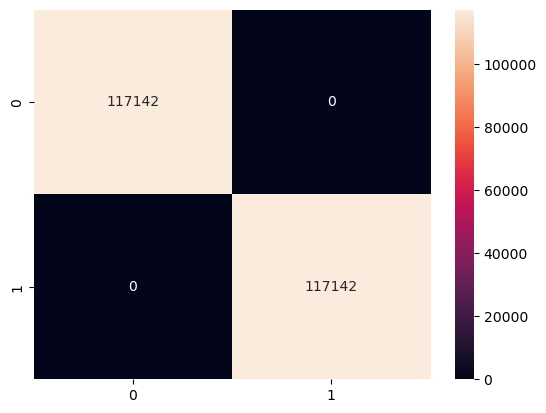

         Model  Accuracy  Precision  Recall  F1-Score  Train Time  Test Time  \
0  RNN_Model_1       1.0        1.0     1.0       1.0  746.022308   35.25983   

   False Positive Rate  Total Time  
0                  0.0  782.785048  


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

def Train_RNN_Model(x_train, y_train, x_test, y_test, rnn_units=50, epochs=10, batch_size=256):
    start_total_time = time.time()  # Start total time
    
    # Reshape data for RNN (assuming x_train and x_test are 3D arrays)
    import numpy as np

    # Assuming x_train and x_test are DataFrames, convert them to NumPy arrays
    x_train_array = x_train.to_numpy()
    x_test_array = x_test.to_numpy()

    # Reshape the arrays for RNN
    x_train_rnn = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)
    x_test_rnn = x_test_array.reshape(x_test_array.shape[0], x_test_array.shape[1], 1)
    
    # Build the RNN model
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(rnn_units, input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
    rnn_model.add(Dense(3, activation='sigmoid'))
    
    # Compile the model
    rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training
    start_train_time = time.time()
    rnn_model.fit(x_train_rnn, y_train, epochs=epochs, batch_size=batch_size)
    end_train_time = time.time()
    
    # Testing (Prediction)
    start_test_time = time.time()
    predictions = (rnn_model.predict(x_test_rnn) > 0.5).astype(int)
    end_test_time = time.time()

    end_total_time = time.time()  # End total time
    
    # Calculating metrics
    Acc = accuracy_score(y_test, predictions)
    Prec = precision_score(y_test, predictions)
    Rec = recall_score(y_test, predictions)
    F1 = f1_score(y_test, predictions)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    FPR = fp / (fp + tn)
    
    print(classification_report(y_test, predictions))

    # Plot the confusion matrix
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
    plt.show()
    
    return Acc, Prec, Rec, F1, FPR, end_train_time - start_train_time, end_test_time - start_test_time, end_total_time - start_total_time

# Define your machine learning models in a dictionary
Models = {
    'RNN_Model_1': Sequential([SimpleRNN(50), Dense(1, activation='sigmoid')]),
    #'RNN_Model_2': Sequential([SimpleRNN(100), Dense(1, activation='sigmoid')])
}

Result_DF = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Train Time', 'Test Time', 'False Positive Rate', 'Total Time'])

for idxModel, Model in Models.items():
    print(f'Model being trained: {idxModel}')
    Acc, Prec, Rec, F1, FPR, Train_Time, Test_Time, Total_Time = Train_RNN_Model(x_train, y_train, x_test, y_test)
    Result_DF = Result_DF._append({
        'Model': idxModel,
        'Accuracy': Acc,
        'Precision': Prec,
        'Recall': Rec,
        'F1-Score': F1,
        'Train Time': Train_Time,
        'Test Time': Test_Time,
        'False Positive Rate': FPR,
        'Total Time': Total_Time
    }, ignore_index=True)

print(Result_DF)